In [1]:
!pip install pandas-datareader

In [143]:
import pandas_datareader as pdr
import pandas as pd
import matplotlib.pyplot as plt

In [144]:
df=pdr.get_data_tiingo("TSLA",api_key='195c5f38b64cffafcac41f18609d1b1bdec2a705')

In [145]:
df=df.reset_index()

In [146]:
df=pd.DataFrame(df)

In [147]:
df

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,TSLA,2016-03-11 00:00:00+00:00,207.50,209.4200,205.330,207.93,3343077,41.500,41.8840,41.066,41.586,16715385,0.0,1.0
1,TSLA,2016-03-14 00:00:00+00:00,215.15,216.7200,210.640,212.65,4065706,43.030,43.3440,42.128,42.530,20328530,0.0,1.0
2,TSLA,2016-03-15 00:00:00+00:00,218.34,218.9700,211.500,214.27,3180452,43.668,43.7940,42.300,42.854,15902260,0.0,1.0
3,TSLA,2016-03-16 00:00:00+00:00,221.93,222.5800,217.020,218.00,3516703,44.386,44.5160,43.404,43.600,17583515,0.0,1.0
4,TSLA,2016-03-17 00:00:00+00:00,226.38,228.5000,220.000,221.47,3782891,45.276,45.7000,44.000,44.294,18914455,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1252,TSLA,2021-03-03 00:00:00+00:00,653.20,700.7000,651.705,687.99,30207960,653.200,700.7000,651.705,687.990,30207960,0.0,1.0
1253,TSLA,2021-03-04 00:00:00+00:00,621.44,668.4500,600.000,655.80,64799898,621.440,668.4500,600.000,655.800,64799898,0.0,1.0
1254,TSLA,2021-03-05 00:00:00+00:00,597.95,627.8419,539.490,626.06,89396459,597.950,627.8419,539.490,626.060,89396459,0.0,1.0
1255,TSLA,2021-03-08 00:00:00+00:00,563.00,620.1250,558.790,600.55,51786958,563.000,620.1250,558.790,600.550,51786958,0.0,1.0


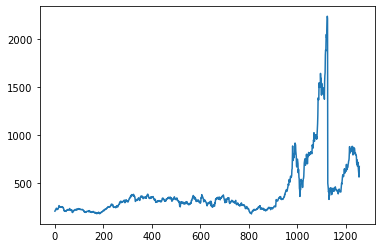

In [148]:
plt.plot(df["close"])

In [149]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [150]:
scaler=MinMaxScaler(feature_range=(0,1))
df1=np.array(df["close"])
df1=df1.reshape(-1,1)

In [151]:
df1=scaler.fit_transform(df1)

In [152]:
df1

array([[0.01385099],
       [0.01756498],
       [0.01911369],
       ...,
       [0.20341007],
       [0.18644224],
       [0.24012759]])

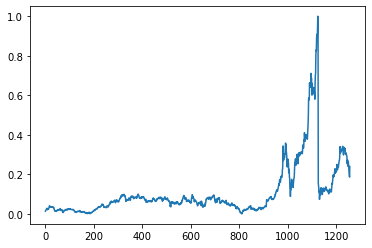

In [153]:
plt.plot(df1)

In [154]:
l=len(df1)*70//100

In [155]:
train_data,test_data=df1[:l],df1[l+1:]

In [156]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [157]:
time_step = 100
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [158]:
X_train.shape,Y_train.shape,X_test.shape,Y_test.shape
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1],1)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [159]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LSTM

In [160]:
model=Sequential()

In [161]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [162]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_6 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [163]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
13/13 [==============================] - 7s 188ms/step - loss: 0.0016 - val_loss: 0.0636
Epoch 2/100
13/13 [==============================] - 2s 125ms/step - loss: 3.7596e-04 - val_loss: 0.0351
Epoch 3/100
13/13 [==============================] - 2s 126ms/step - loss: 1.7505e-04 - val_loss: 0.0222
Epoch 4/100
13/13 [==============================] - 2s 123ms/step - loss: 1.3062e-04 - val_loss: 0.0231
Epoch 5/100
13/13 [==============================] - 2s 124ms/step - loss: 1.4096e-04 - val_loss: 0.0195
Epoch 6/100
13/13 [==============================] - 2s 126ms/step - loss: 1.3169e-04 - val_loss: 0.0197
Epoch 7/100
13/13 [==============================] - 2s 127ms/step - loss: 1.0715e-04 - val_loss: 0.0181
Epoch 8/100
13/13 [==============================] - 2s 123ms/step - loss: 1.0343e-04 - val_loss: 0.0186
Epoch 9/100
13/13 [==============================] - 2s 124ms/step - loss: 1.1505e-04 - val_loss: 0.0175
Epoch 10/100
13/13 [==============================] - 2s 12

13/13 [==============================] - 2s 124ms/step - loss: 3.1954e-05 - val_loss: 0.0094
Epoch 79/100
13/13 [==============================] - 2s 123ms/step - loss: 2.8945e-05 - val_loss: 0.0095
Epoch 80/100
13/13 [==============================] - 2s 121ms/step - loss: 3.2650e-05 - val_loss: 0.0097
Epoch 81/100
13/13 [==============================] - 2s 122ms/step - loss: 2.9107e-05 - val_loss: 0.0091
Epoch 82/100
13/13 [==============================] - 2s 122ms/step - loss: 3.0208e-05 - val_loss: 0.0092
Epoch 83/100
13/13 [==============================] - 2s 122ms/step - loss: 3.3429e-05 - val_loss: 0.0091
Epoch 84/100
13/13 [==============================] - 2s 122ms/step - loss: 2.8217e-05 - val_loss: 0.0094
Epoch 85/100
13/13 [==============================] - 2s 120ms/step - loss: 2.9596e-05 - val_loss: 0.0092
Epoch 86/100
13/13 [==============================] - 2s 122ms/step - loss: 2.8358e-05 - val_loss: 0.0095
Epoch 87/100
13/13 [==============================] - 2s 12

In [165]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [166]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

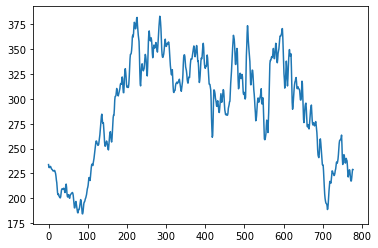

In [167]:
plt.plot(train_predict)

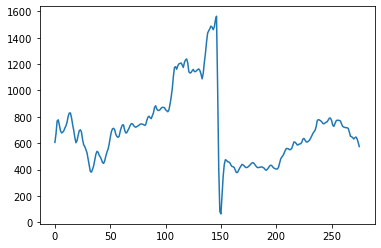

In [168]:
plt.plot(test_predict)

In [169]:
import math
from sklearn.metrics import mean_squared_error

In [170]:
math.sqrt(mean_squared_error(Y_train,train_predict))

295.66513368751964

In [171]:
math.sqrt(mean_squared_error(Y_test,test_predict))

759.4115696500436

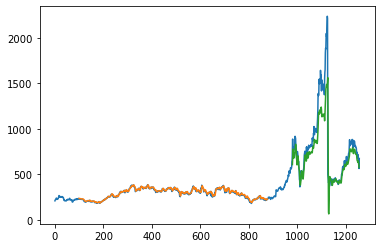

In [172]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+2:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [399]:
x_input=Y_test[-100:].reshape(100)
x_input

array([0.12995563, 0.13706804, 0.13103827, 0.12656691, 0.12227519,
       0.1179592 , 0.11829904, 0.11982833, 0.11732321, 0.11715329,
       0.11928944, 0.11023022, 0.11256542, 0.10150113, 0.10755518,
       0.11891076, 0.11749313, 0.12579984, 0.12184796, 0.11762907,
       0.11233724, 0.115624  , 0.11301692, 0.11143423, 0.11123518,
       0.12750876, 0.14937032, 0.15550204, 0.15081222, 0.16646438,
       0.18274282, 0.19178262, 0.19749197, 0.18867549, 0.19700648,
       0.18926779, 0.20119139, 0.20393926, 0.22467933, 0.2286215 ,
       0.20658031, 0.21754751, 0.20925536, 0.22374234, 0.22054783,
       0.2154599 , 0.23154415, 0.25052676, 0.22861179, 0.22398994,
       0.2267281 , 0.23439396, 0.2353261 , 0.23644273, 0.25041995,
       0.25570692, 0.2674072 , 0.26999971, 0.28013186, 0.30929031,
       0.34035188, 0.30693569, 0.32550564, 0.32791852, 0.32335007,
       0.31420346, 0.3231316 , 0.32599598, 0.32334521, 0.32414627,
       0.34073056, 0.34184233, 0.33265203, 0.31870394, 0.29836

In [390]:
temp_input=x_input.reshape(100).tolist()

In [391]:
temp_input

[0.1299556263290254,
 0.13706803639223603,
 0.13103826622260628,
 0.12656691491324318,
 0.12227519443824096,
 0.11795919952616297,
 0.11829904164522421,
 0.1198283311809999,
 0.1173232092747769,
 0.11715328821524627,
 0.11928943867791704,
 0.11023021876122689,
 0.11256541960791926,
 0.10150113118876773,
 0.10755517579547329,
 0.11891075745953449,
 0.11749313033430754,
 0.12579984270164773,
 0.12184796434570681,
 0.11762906718193204,
 0.11233723989940674,
 0.11562399867947061,
 0.11301692413752924,
 0.11143423084018679,
 0.11123518045616519,
 0.12750876307178438,
 0.14937032110225362,
 0.15550204390760175,
 0.1508122226645564,
 0.16646437969103495,
 0.1827428171940692,
 0.1917826175610987,
 0.1974919651613279,
 0.18867548961539576,
 0.19700647641981178,
 0.18926778588004545,
 0.2011913893716804,
 0.20393925564866144,
 0.22467933468622858,
 0.2286215032673392,
 0.20658031440250896,
 0.21754750507335735,
 0.20925535736826262,
 0.22374234141510257,
 0.22054782549592672,
 0.2154599034848381

In [392]:
len(temp_input)

100

In [400]:
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    t=model.predict(x_input.reshape(1,100,1))
    print(scaler.inverse_transform(np.array(t[0]).reshape(-1,1)))
    lst_output.append(t[0][0])
    x_input=np.append(x_input,t[0][0])
    x_input=np.array(x_input[1:])
    i=i+1

[[543.6]]
[[519.5]]
[[501.15067]]
[[487.2818]]
[[477.01385]]
[[469.57663]]
[[464.20477]]
[[460.17847]]
[[456.88715]]
[[453.86917]]
[[450.82224]]
[[447.59058]]
[[444.13733]]
[[440.51044]]
[[436.80795]]
[[433.14642]]
[[429.63702]]
[[426.36884]]
[[423.40042]]
[[420.75812]]
[[418.439]]
[[416.41736]]
[[414.65256]]
[[413.09656]]
[[411.70068]]
[[410.4205]]
[[409.2196]]
[[408.0706]]
[[406.95538]]
[[405.86423]]


In [401]:
predict_30=np.array(lst_output)

In [402]:
predict_30=predict_30.reshape(-1,1)

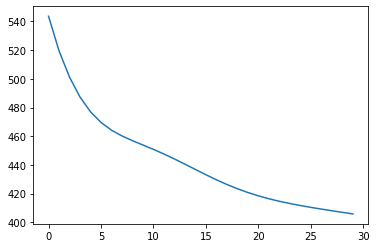

In [403]:
plt.plot(scaler.inverse_transform(predict_30))

In [404]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [405]:
y1=scaler.inverse_transform(Y_test[-100:].reshape(-1,1))
y1

array([[446.65],
       [461.3 ],
       [448.88],
       [439.67],
       [430.83],
       [421.94],
       [422.64],
       [425.79],
       [420.63],
       [420.28],
       [424.68],
       [406.02],
       [410.83],
       [388.04],
       [400.51],
       [423.9 ],
       [420.98],
       [438.09],
       [429.95],
       [421.26],
       [410.36],
       [417.13],
       [411.76],
       [408.5 ],
       [408.09],
       [441.61],
       [486.64],
       [499.27],
       [489.61],
       [521.85],
       [555.38],
       [574.  ],
       [585.76],
       [567.6 ],
       [584.76],
       [568.82],
       [593.38],
       [599.04],
       [641.76],
       [649.88],
       [604.48],
       [627.07],
       [609.99],
       [639.83],
       [633.25],
       [622.77],
       [655.9 ],
       [695.  ],
       [649.86],
       [640.34],
       [645.98],
       [661.77],
       [663.69],
       [665.99],
       [694.78],
       [705.67],
       [729.77],
       [735.11],
       [755.98

In [406]:
y2=scaler.inverse_transform(predict_30)
y2

array([[543.6    ],
       [519.5    ],
       [501.15067],
       [487.2818 ],
       [477.01385],
       [469.57663],
       [464.20477],
       [460.17847],
       [456.88715],
       [453.86917],
       [450.82224],
       [447.59058],
       [444.13733],
       [440.51044],
       [436.80795],
       [433.14642],
       [429.63702],
       [426.36884],
       [423.40042],
       [420.75812],
       [418.439  ],
       [416.41736],
       [414.65256],
       [413.09656],
       [411.70068],
       [410.4205 ],
       [409.2196 ],
       [408.0706 ],
       [406.95538],
       [405.86423]], dtype=float32)

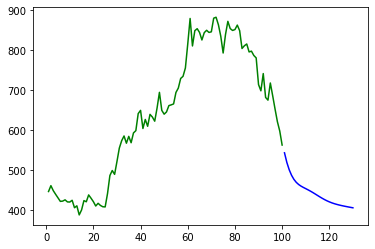

In [407]:
plt.plot(day_new,y1,"g")
plt.plot(day_pred,y2,"b")